# Visualize bootstrap test

This code uses bootstrapping to compare each model's performance across 30 runs.

## Set-up

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Upload and concatenate data
baseline_model_stat_test = pd.read_pickle('../Data/baseline_model_stat_test.pkl')
bert_model_stat_test = pd.read_pickle('../Data/bert_model_stat_test.pkl')
model_stat_test_df = pd.concat([baseline_model_stat_test, bert_model_stat_test])
model_stat_test_df.head()

,Approach,Module,F1
0,Dictionary,Process_action,0.723929
457,Dictionary,Environment,0.867416
458,Dictionary,Environment,0.870921
459,Dictionary,Environment,0.85665
460,Dictionary,Environment,0.868214


In [3]:
# Sort values into right order
sorter = ['Dictionary','Naive Bayes','Augmented Naive Bayes', 'SVM',
          'Augmented SVM','BERT','BERT_AUG','ESG-BERT','ESG-BERT_AUG']
model_stat_test_df['Approach'] = model_stat_test_df['Approach'].astype("category")
model_stat_test_df['Approach'] = model_stat_test_df['Approach'].cat.set_categories(sorter)
model_stat_test_df.sort_values('Approach', inplace=True)

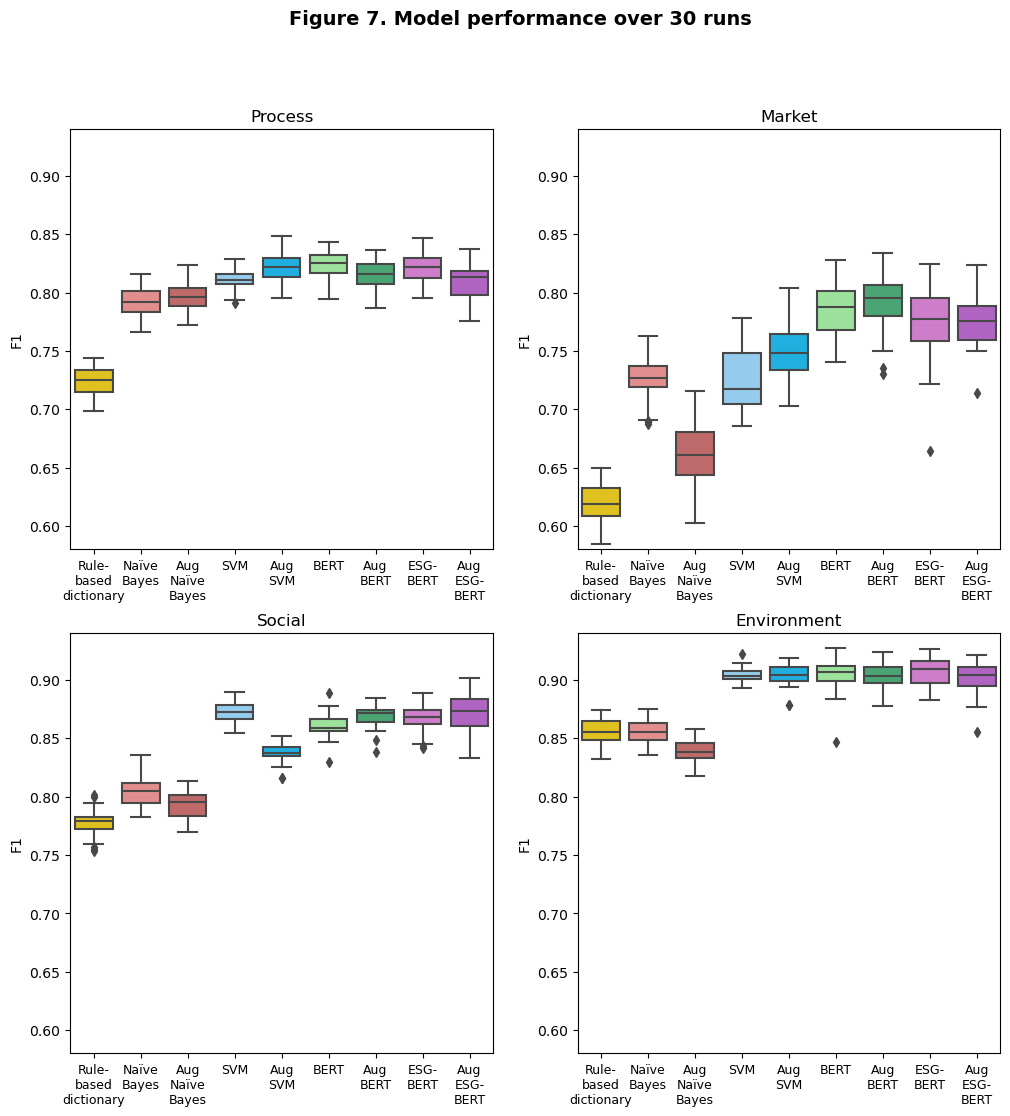

In [4]:
mapper = {'Dictionary':'Rule-based dictionary',
          'Naive Bayes':'Naïve Bayes',
          'Augmented Naive Bayes':'Aug Naïve Bayes',
          'SVM':'SVM',
          'Augmented SVM':'Aug SVM',
          'BERT':'BERT',
          'BERT_AUG':'Aug BERT',
          'ESG-BERT':'ESG-BERT',
          'ESG-BERT_AUG':'Aug ESG-BERT'}

color_list = ['gold','lightcoral','indianred','lightskyblue','deepskyblue',
              'lightgreen','mediumseagreen','orchid','mediumorchid']

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,12))
for col, ax, title in zip(['Process_action', 'Market_action', 'Social', 'Environment'],
                   [ax1,ax2,ax3,ax4],['Process','Market', 'Social', 'Environment']):
    sns.boxplot(data=model_stat_test_df[model_stat_test_df['Module']==col], 
                x='Approach', y='F1', ax=ax, palette = color_list)
    ax.set_title(title)
    ax.set_xlabel('')
    labels = [mapper[label] for label in list(model_stat_test_df['Approach'].unique())]
    labels = [l.replace(' ','\n') for l in labels]
    labels = [l.replace('-','-\n') for l in labels]
    ax.set_xticklabels(labels=labels, fontsize=9,
                       wrap=True, rotation=0)
    ax.set_ylim(0.58,0.94)

plt.suptitle('Figure 7. Model performance over 30 runs', fontsize=14, weight='bold')
fig.set_constrained_layout_pads(hspace=0.1)
plt.savefig("../Figures/model_stat_test.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [5]:
# Get table with average performance (based on statistical test)
order = ['Dictionary','Naive Bayes','Augmented Naive Bayes','SVM','Augmented SVM','BERT',
         'BERT_AUG','ESG-BERT','ESG-BERT_AUG']
model_stat_test_df.groupby(['Module','Approach']).mean().round(4).unstack('Module').reindex(order)

F1                                     
Module                Environment Market_action Process_action  Social
Approach                                                              
Dictionary                 0.8559        0.6188         0.7242  0.7775
Naive Bayes                0.8544        0.7260         0.7923  0.8039
Augmented Naive Bayes      0.8384        0.6624         0.7965  0.7936
SVM                        0.9040        0.7236         0.8121  0.8717
Augmented SVM              0.9041        0.7501         0.8217  0.8371
BERT                       0.9045        0.7877         0.8233  0.8605
BERT_AUG                   0.9030        0.7902         0.8157  0.8687
ESG-BERT                   0.9076        0.7715         0.8215  0.8678
ESG-BERT_AUG               0.9019        0.7759         0.8101  0.8725

In [6]:
model_stat_test_df.to_pickle('../Data/model_stat_test_df.pkl')